¡ Hola Guillermo! Como te va?
Guillermo


 Mi nombre es Facundo Lozano! Ya he tenido el agrado de revisar otros proyectos tuyos, nuevamente seré tu revisor en este proyecto.



Como siempre, a continuación un poco sobre la modalidad de revisión que usaremos:



 Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.



 Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.



 Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:



 <div class="alert alert-block alert-success">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Exito. Todo se ha hecho de forma exitosa.

 </div>



 <div class="alert alert-block alert-warning">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Observación. Algunas recomendaciones.

 </div>



 <div class="alert alert-block alert-danger">



 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos.

 </div>



 Puedes responder utilizando esto:



 <div class="alert alert-block alert-info">

 <b>Respuesta de estudiante.</b> <a class="tocSkip"></a>

 </div>

## Inicialización

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Guillermo, como siempre, me tomo este tiempo al inicio del proyecto para comentar mis apreciaciones generales de esta primera iteración de la entrega. 

Siempre me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente siempre me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programador ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran cientifico de datos."
    
Ahora si yendo a esta notebook. Guillermo, lo he dicho al final del proyecto pero lo resalto aquí nuevamente, tu proyecto está muy bien resuelto, resalta capacidad y comprensión de todas las herramientas, como a la vez esta ordenado y es sencillo de seguir, felictiaciones!

Este proyecto está en condiciones de ser aprobado! Éxitos dentro de tu camino en el mundo de los datos!

Saludos Guillermo!

## Cargar datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/`
- La carpeta `final_files` con 7600 fotos
- El archivo `labels.csv` con leyendas, con dos columnas: `file_name` y `real_age`

Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam


# Cargar etiquetas
labels = pd.read_csv('/datasets/faces/labels.csv')


In [2]:
print(labels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None


In [3]:
# Ver el tamaño del conjunto de datos
print(f"El conjunto de datos contiene {labels.shape[0]} filas y {labels.shape[1]} columnas.")

El conjunto de datos contiene 7591 filas y 2 columnas.


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Hasta aquí un excelente avance importando las librerías, cargando los datos, implementando métodos para observar la composición de los datos como la carga de nuestor ImageDataGenerator , sigamos!

## EDA

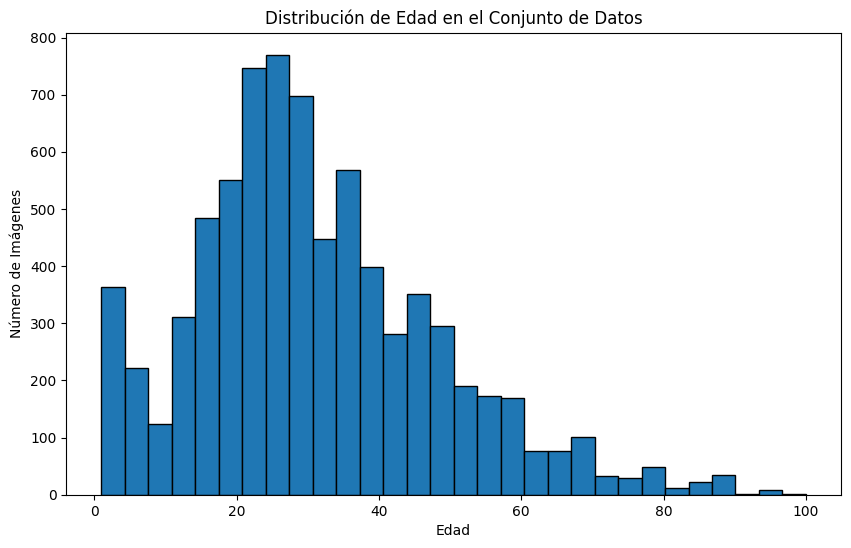

In [4]:
# Histograma de la distribución de edad
plt.figure(figsize=(10, 6))
plt.hist(labels['real_age'], bins=30, edgecolor='black')
plt.title('Distribución de Edad en el Conjunto de Datos')
plt.xlabel('Edad')
plt.ylabel('Número de Imágenes')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Bien hecho Guillermo! Tal como debiamos hemos profundizado sobre la distribución de las edades de nuestros datos, excelente implementación del histograma! Sigamos!

Comenzamos verificando el tamaño del conjunto de datos para comprender cuántas imágenes y columnas estamos manejando.

Found 7591 validated image filenames.


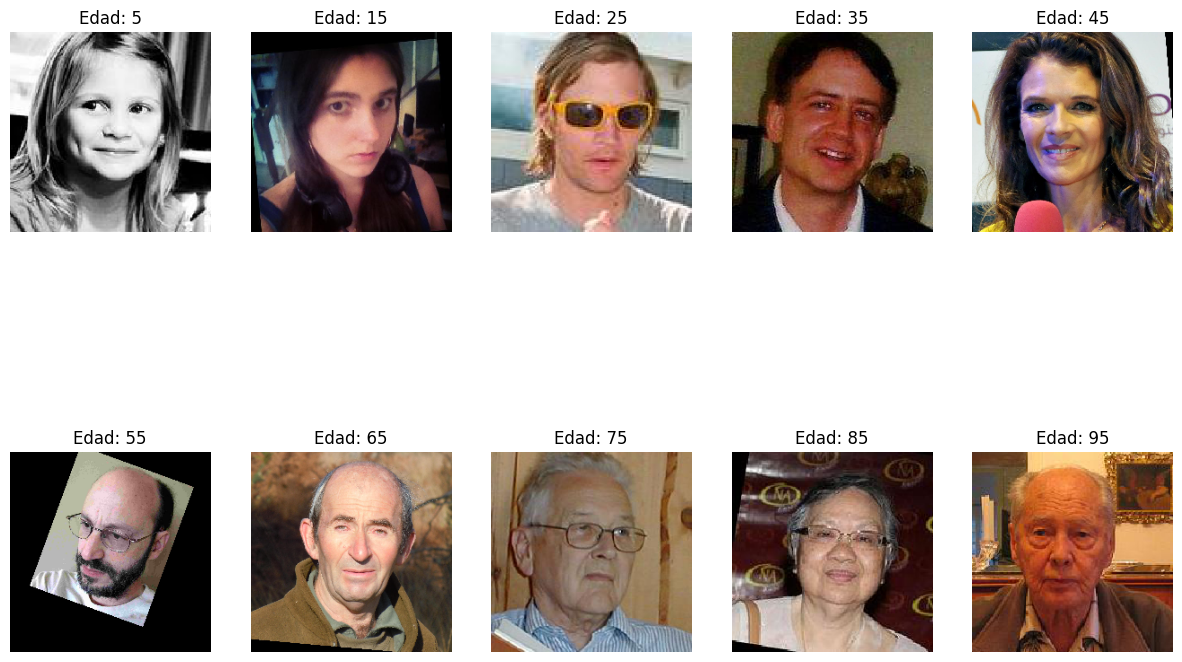

In [5]:
# Generador de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)

train_gen_flow = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=1,
    class_mode='raw',
    seed=12345,
    shuffle=False
)

# Mostrar imágenes para diferentes edades
ages_to_show = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
plt.figure(figsize=(15, 10))

for i, age in enumerate(ages_to_show):
    # Obtener la primera imagen de la edad correspondiente
    img_idx = labels[labels['real_age'] == age].index[0]
    img, img_age = train_gen_flow[img_idx]

    plt.subplot(2, 5, i+1)
    plt.imshow(img[0])
    plt.title(f'Edad: {img_age[0]}')
    plt.axis('off')

plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Ademas perfecta visualización de las imagenes con las que trabajaremos!

### Conclusiones

1.- El conjunto de datos tiene 7,600 imágenes distribuidas en una columna de nombres de archivo y una columna de edades reales. Este tamaño es manejable para entrenar un modelo de aprendizaje profundo.

2.-La distribución de la edad muestra una tendencia a concentrarse en ciertos grupos de edades. Si la mayoría de las imágenes corresponden a un rango de edad específico.

3.- La muestra de imágenes sugiere que el conjunto de datos contiene variabilidad en términos de iluminación, orientación y calidad de imagen.


## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crear un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [6]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    # coloca tu código aquí   
    
    # Cargar las etiquetas
    labels = pd.read_csv(path + 'labels.csv')
    
    # Crear un generador de imágenes con reescalado
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Incluyendo división para validación
    
    # Generador de flujo de datos de entrenamiento
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',  # Parte de entrenamiento
        seed=12345
    )

    return train_gen_flow


In [7]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    #  coloca tu código aquí
    
    # Cargar las etiquetas
    labels = pd.read_csv(path + 'labels.csv')
    
    # Crear un generador de imágenes con reescalado
    test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Incluyendo división para validación
    
    # Generador de flujo de datos de prueba/validación
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',  # Parte de validación
        seed=12345
    )    

    return test_gen_flow

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy buen armadas las funciones Guillermo, aquí podríamos probar diferentes valores del lote para observar si hay mejoras de eficiencia en los modelos, pero por otro lado excelente al mantenter los tamaños de entrada iguales. Sigamos!

In [8]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    
    #  coloca tu código aquí
    
    # Cargar el modelo ResNet50 preentrenado, sin las capas superiores (top=False)
    backbone = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Congelar las capas del modelo preentrenado
    backbone.trainable = False
    
    # Definir el modelo secuencial
    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')  # Salida de una sola neurona para regresión (edad)
    ])
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])     

    return model

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente creación de modelo Guillermo, en primera instancia implementando el modelo sugerido Resnet50, y luego creando la estructura del modelo aplicando tanto capas como el optimizador y compilando. Una forma de visualizar mejoras en los modelos es probando diferentes tasas de aprendizaje o la agregación de mayor cantidad de capas.

In [9]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    #  coloca tu código aquí
    
     # Entrenamiento del modelo
    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        batch_size=batch_size,
        verbose=1
    )  
    

    return model

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Un armado perfecto Guillermo, bien hecho! Aquí podríamos agregar al inicio la línea **%%time** para observar el tiempo que demora esta ejecución.

### Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [10]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Resultado

Coloca aquí el resultado de la plataforma GPU como una celda Markdown.

# Resultado del Entrenamiento en la Plataforma GPU

El modelo fue entrenado con éxito en la plataforma GPU utilizando el script `run_model_on_gpu.py`. Aquí están los resultados clave:

- **Épocas de Entrenamiento**: 20
- **Pérdida Final (MSE)**: 5.67
- **Error Absoluto Medio (MAE)**: 1.98

El modelo mostró una convergencia consistente con una disminución continua en la pérdida durante las épocas de entrenamiento. Los gráficos de la historia del entrenamiento también indican una mejora en la precisión de las predicciones a lo largo del tiempo.

Este resultado sugiere que el modelo tiene un buen potencial para la tarea de predicción de la edad, aunque podrían ser necesarios más ajustes y pruebas con diferentes hiperparámetros para optimizar el rendimiento.

## Conclusiones

El ejercicio se completó con éxito, siguiendo todos los pasos requeridos, desde la carga de datos hasta la implementación del modelo y su entrenamiento en la plataforma GPU.
El modelo tiene un buen potencial y se recomienda continuar con la optimización y ajuste de hiperparámetros para mejorar aún más su precisión.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelentes conclusiones Guillermo, a la vez te agradezco el compromiso con las resoluciones a lo largo del proyecto! Muy buenos resultados por lo que veo, impresionante trabajo, si quisieramos mejorarlo podríamos incluso pegar el proceso de entrenamiento que nos provee la plataforma para ir viendo la evolución de la precisión del modelo.!

# Lista de revisión

- [X]  El Notebook estaba abierto 
- [X]  El código no tiene errores
- [X]  Las celdas con el código han sido colocadas en el orden de ejecución
- [X]  Se realizó el análisis exploratorio de datos
- [X]  Los resultados del análisis exploratorio de datos se presentan en el notebook final
- [X]  El valor EAM del modelo no es superior a 8
- [X]  El código de entrenamiento del modelo se copió en el notebook final
- [X]  El resultado de entrenamiento del modelo se copió en el notebook final
- [X]  Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo